In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
source = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C'
df = pd.read_html(source, match='Коефіцієнт народжуваності в регіонах України', thousands=".", decimal=",")[0]

In [101]:
#Вивести перші рядки таблиці за допомогою методу head
df.head(5)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,—,—
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,—


In [102]:
#Визначте кількість рядків та стовпців у датафреймі (атрибут shape)
lines, columns = df.shape
print(f'Number of lines: {lines}')
print(f'Number of columns: {columns}')

Number of lines: 28
Number of columns: 9


In [103]:
#Замініть у таблиці значення "—" на значення NaN
df = df.replace({'—': np.NaN})
df.head(5)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN


In [104]:
#Визначте типи всіх стовпців за допомогою dataframe.dtypes
df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object

In [105]:
#Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"
nan_columns = df.columns[df.isnull().any()].tolist()
df[nan_columns] = df[nan_columns].astype(float)

df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object

In [106]:
#Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
df.isnull().sum() / len(df)  

Регіон    0.000000
1950      0.071429
1960      0.035714
1970      0.035714
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.071429
2019      0.142857
dtype: float64

In [107]:
#Видаліть з таблиці дані по всій країні, останній рядок таблиці
df = df.drop([27], axis=0)
df.tail(5)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
22,Черкаська,20.5,17.9,14.4,12.3,7.5,10.0,9.8,6.4
23,Чернівецька,24.7,21.8,17.0,14.8,10.1,12.8,12.9,9.2
24,Чернігівська,22.0,18.3,12.7,10.8,6.9,9.4,9.0,6.1
25,Київ,NaN,17.4,15.9,12.0,7.3,12.0,12.1,11.0
26,Севастополь,NaN,NaN,NaN,12.5,7.0,12.0,NaN,NaN


In [108]:
#Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)
df = df.fillna(df.mean(numeric_only=True), axis=0)
df.head(5)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,11.144,8.017391
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.900,7.600000
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.100,10.100000
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.100,7.100000
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.200,8.017391


In [109]:
#Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
avg = df['2019'].mean()
df.loc[df['2019'] > avg]

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
2,Волинська,24.700,25.0,17.9,15.3,11.2,14.8,14.1,10.1
6,Закарпатська,31.400,27.3,20.7,16.8,11.5,15.1,14.6,10.4
8,Івано-Франківська,24.300,24.8,18.2,15.5,10.3,12.4,12.2,8.8
12,Львівська,23.400,24.0,17.1,14.0,9.1,11.9,11.9,8.7
14,Одеська,24.100,19.2,14.8,12.6,8.0,12.7,12.3,8.8
16,Рівненська,26.900,26.7,19.3,15.8,11.8,15.9,14.8,10.7
20,Херсонська,20.800,21.4,16.6,14.3,8.5,11.7,11.5,8.1
23,Чернівецька,24.700,21.8,17.0,14.8,10.1,12.8,12.9,9.2
25,Київ,23.104,17.4,15.9,12.0,7.3,12.0,12.1,11.0


In [110]:
#У якому регіоні була найвища народжуваність у 2014 році?
max_value_region = df[df['2014'] == df['2014'].max()]['Регіон']
max_value_region

16    Рівненська
Name: Регіон, dtype: object

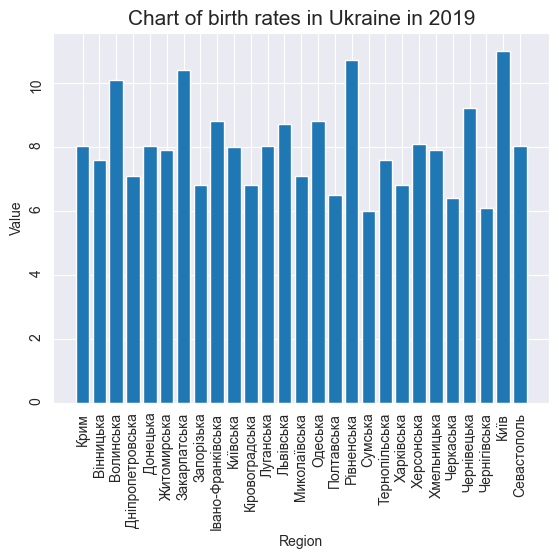

In [111]:
#Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році
sns.set_style('darkgrid')

plt.bar(df['Регіон'], df['2019'])
plt.xlabel("Region")
plt.ylabel("Value")
plt.title("Chart of birth rates in Ukraine in 2019", fontsize=15)

plt.tick_params(labelrotation = 90)

plt.show()

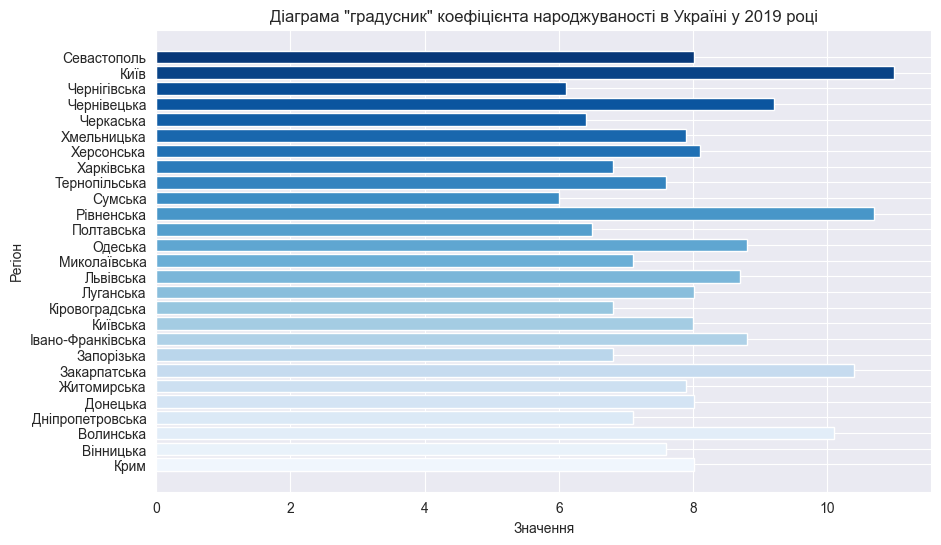

In [112]:
plt.figure(figsize=(10, 6))
colors = sns.color_palette('Blues', len(df['Регіон']))
plt.barh(df['Регіон'], df['2019'], color=colors)
plt.xlabel('Значення')
plt.ylabel('Регіон')
plt.title('Діаграма "градусник" коефіцієнта народжуваності в Україні у 2019 році')
plt.show()

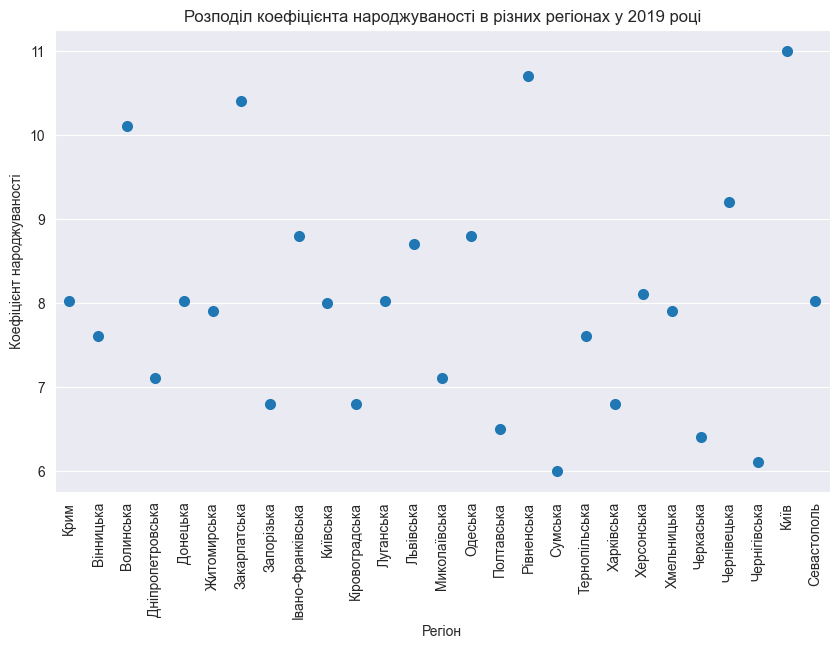

In [113]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='Регіон', y='2019', data=df, size=8, jitter=0.3)
plt.xlabel('Регіон')
plt.ylabel('Коефіцієнт народжуваності')
plt.title('Розподіл коефіцієнта народжуваності в різних регіонах у 2019 році')
plt.xticks(rotation=90)
plt.show()


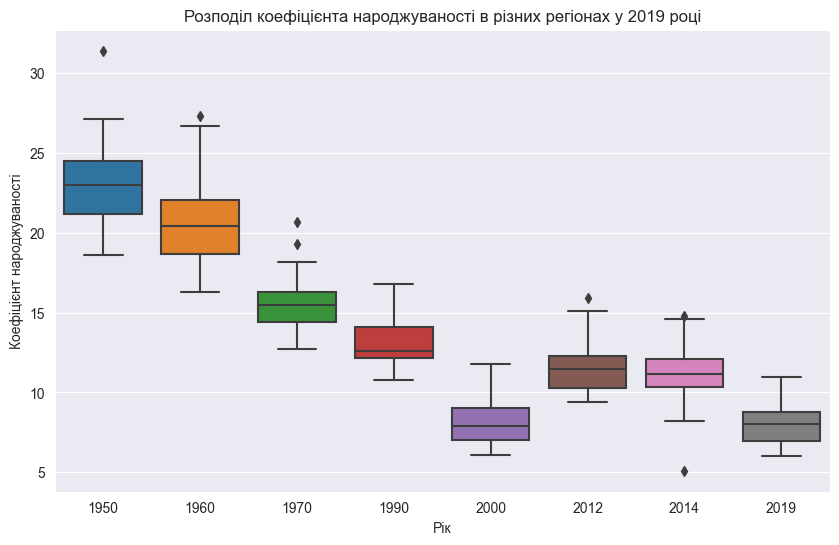

In [114]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(['Регіон'], axis=1))
plt.xlabel('Рік')
plt.ylabel('Коефіцієнт народжуваності')
plt.title('Розподіл коефіцієнта народжуваності в різних регіонах у 2019 році')
plt.show()


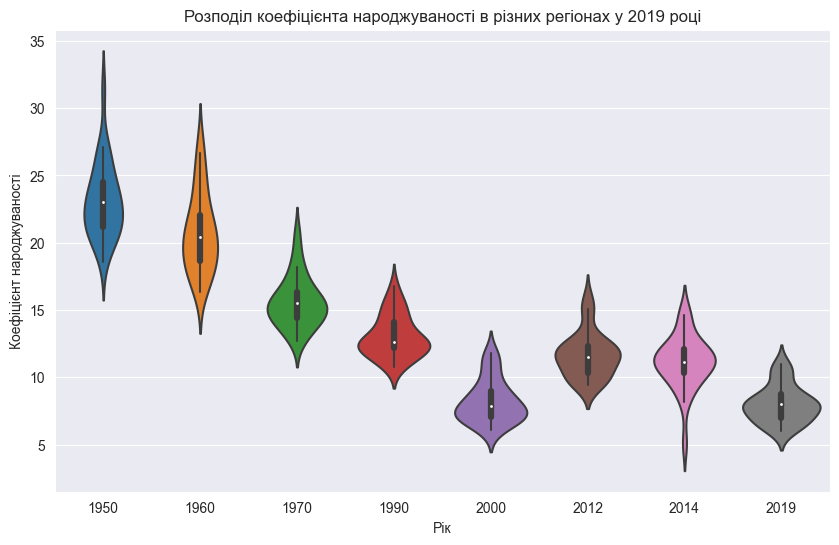

In [115]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df.drop(['Регіон'], axis=1))
plt.xlabel('Рік')
plt.ylabel('Коефіцієнт народжуваності')
plt.title('Розподіл коефіцієнта народжуваності в різних регіонах у 2019 році')
plt.show()
